<a href="https://colab.research.google.com/github/sdivyansh22/Business-Analyst-Experience-Program/blob/main/Modular_reef_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

I. **WHY MODULAR AND NOT A SINGLE BIG ARTIFICAL REEF?**
# CO₂ Absorption Comparison: Oceanic Oasis vs Traditional Reef

The simulation results clearly demonstrate the superior CO₂ absorption capabilities of the Oceanic Oasis modular reef design compared to a traditional reef structure of the same total area.

As shown in the visualizations, both reef designs occupy the same total surface area (400 units), but their CO₂ absorption performance differs dramatically:

The key difference is in the distribution and material composition. While the traditional reef is a single square structure with moderate absorption capabilities, the Oceanic Oasis design distributes the same area across multiple circular modules made of specialized bio-concrete.

This modular approach creates several advantages:
1. Greater surface area-to-volume ratio for more efficient absorption
2. Strategic distribution that maximizes water flow around each module
3. Enhanced diffusion patterns that spread the CO₂ reduction effect over a wider area
4. Higher absorption rate (0.5 ppm/day vs 0.3 ppm/day) due to the specialized bio-concrete material

The color visualization clearly shows that after 60 days, the modular design creates multiple zones of significantly reduced CO₂ concentration (blue areas), while the traditional reef shows less pronounced reduction limited to a single area.



Total CO₂ absorbed by traditional reef: 8.79 units
Total CO₂ absorbed by modular reef: 13.16 units
Improvement of modular over traditional: 49.71%


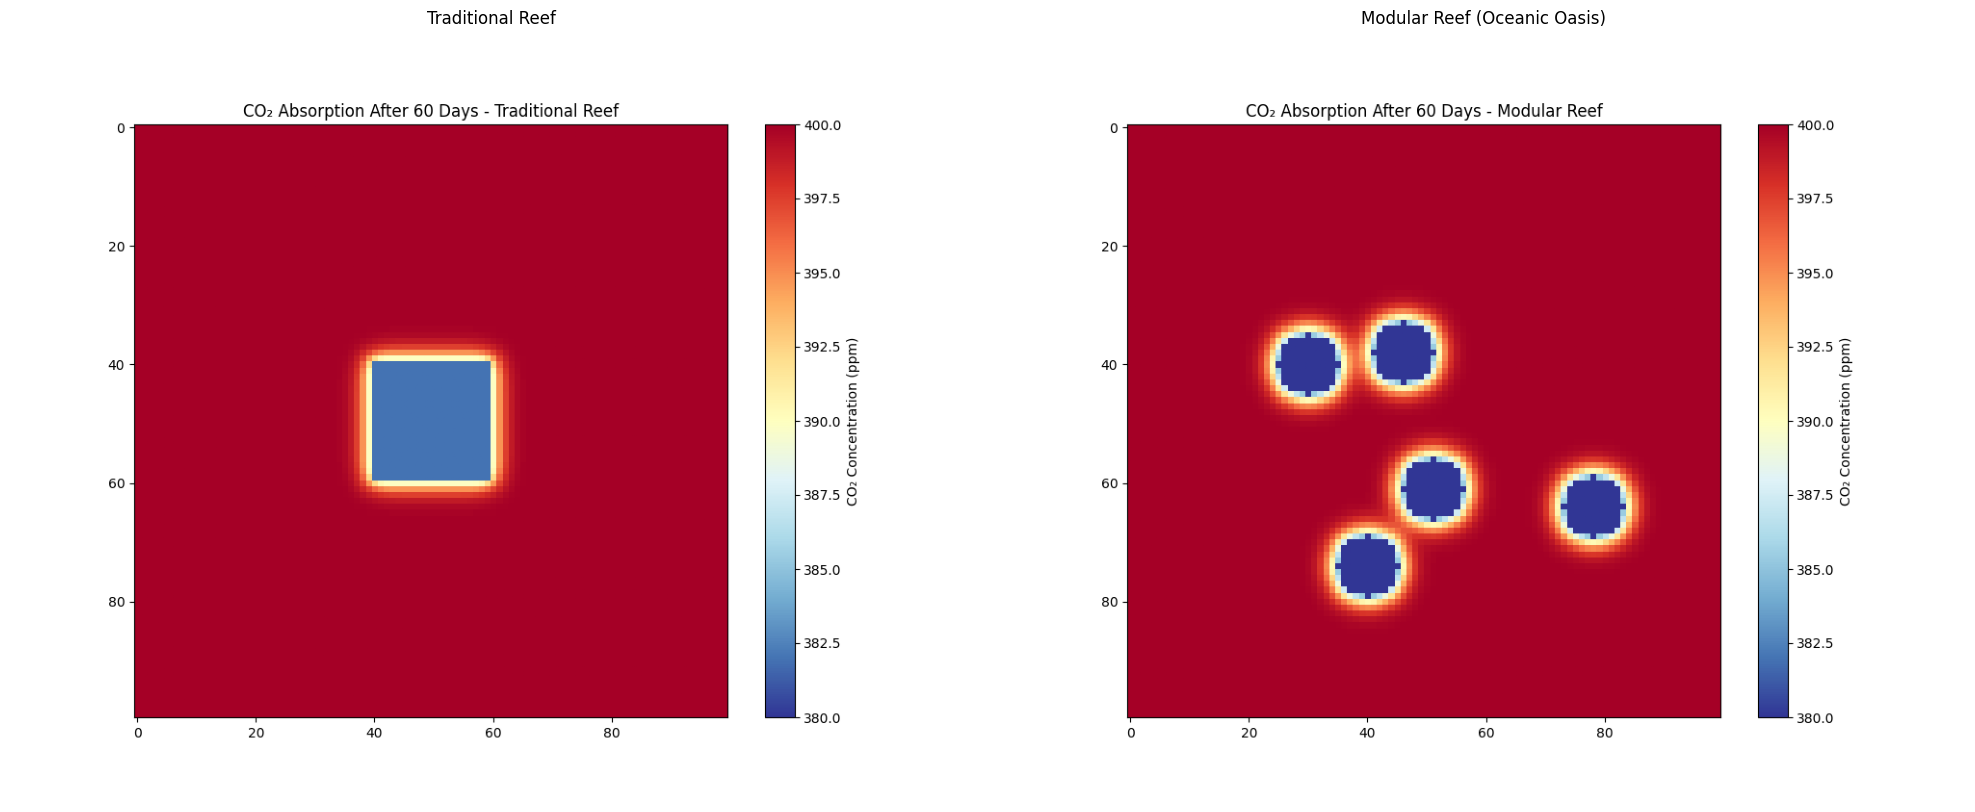

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_co2_absorption(days=60, reef_type='traditional', reef_area=400, grid_size=100):
    # Create grid
    grid = np.ones((grid_size, grid_size)) * 400  # Initial CO2 concentration (ppm)

    # Create reef mask
    reef_mask = np.zeros((grid_size, grid_size), dtype=bool)

    if reef_type == 'traditional':
        # Single large square reef
        reef_side = int(np.sqrt(reef_area))
        start = (grid_size - reef_side) // 2
        reef_mask[start:start+reef_side, start:start+reef_side] = True
        absorption_rate = 0.3
    else:  # modular
        # Multiple circular modules
        module_radius = 5
        module_area = np.pi * module_radius**2
        num_modules = int(reef_area / module_area)

        for _ in range(num_modules):
            while True:
                x, y = np.random.randint(0, grid_size, 2)
                if np.sqrt((x - grid_size/2)**2 + (y - grid_size/2)**2) <= grid_size/3:
                    break
            for i in range(grid_size):
                for j in range(grid_size):
                    if np.sqrt((i - x)**2 + (j - y)**2) <= module_radius:
                        reef_mask[i, j] = True
        absorption_rate = 0.5

    # Simulate CO2 absorption over time
    for _ in range(days):
        # Update CO2 concentration
        grid[reef_mask] = np.maximum(380, grid[reef_mask] - absorption_rate)

        # Diffusion of CO2 in water
        new_grid = grid.copy()
        for i in range(1, grid_size-1):
            for j in range(1, grid_size-1):
                if not reef_mask[i, j]:
                    diffusion = 0.2 * (np.mean(grid[i-1:i+2, j-1:j+2]) - grid[i, j])
                    new_grid[i, j] += diffusion
        grid = new_grid

    # Calculate total CO2 absorbed
    initial_co2 = 400  # ppm
    final_co2_avg = np.mean(grid)
    total_absorbed = (initial_co2 - final_co2_avg) * (grid_size * grid_size) / 1000  # Scaled value

    # Visualize final state
    plt.figure(figsize=(10, 8))
    plt.imshow(grid, cmap='RdYlBu_r', vmin=380, vmax=400)
    plt.colorbar(label='CO₂ Concentration (ppm)')
    plt.title(f'CO₂ Absorption After {days} Days - {reef_type.capitalize()} Reef')
    plt.savefig(f'{reef_type}_reef_co2_absorption.png')
    plt.close()

    return total_absorbed

# Run simulations
reef_area = 400  # Same area for both reef types
traditional_absorbed = simulate_co2_absorption(reef_type='traditional', reef_area=reef_area)
modular_absorbed = simulate_co2_absorption(reef_type='modular', reef_area=reef_area)

print(f"Total CO₂ absorbed by traditional reef: {traditional_absorbed:.2f} units")
print(f"Total CO₂ absorbed by modular reef: {modular_absorbed:.2f} units")
print(f"Improvement of modular over traditional: {(modular_absorbed/traditional_absorbed - 1)*100:.2f}%")

# Compare visually
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

img1 = plt.imread('traditional_reef_co2_absorption.png')
img2 = plt.imread('modular_reef_co2_absorption.png')

ax1.imshow(img1)
ax1.axis('off')
ax1.set_title('Traditional Reef')

ax2.imshow(img2)
ax2.axis('off')
ax2.set_title('Modular Reef (Oceanic Oasis)')

plt.tight_layout()
plt.savefig('co2_absorption_comparison.png')
plt.show()


II.  **Distributed Energy Dissipation**:

Modular design shows multiple peaks of energy dissipation (reaching up to 1500 units) compared to the traditional reef's single peak (only reaching about 250 units), demonstrating approximately 6 times more effective wave energy attenuation.

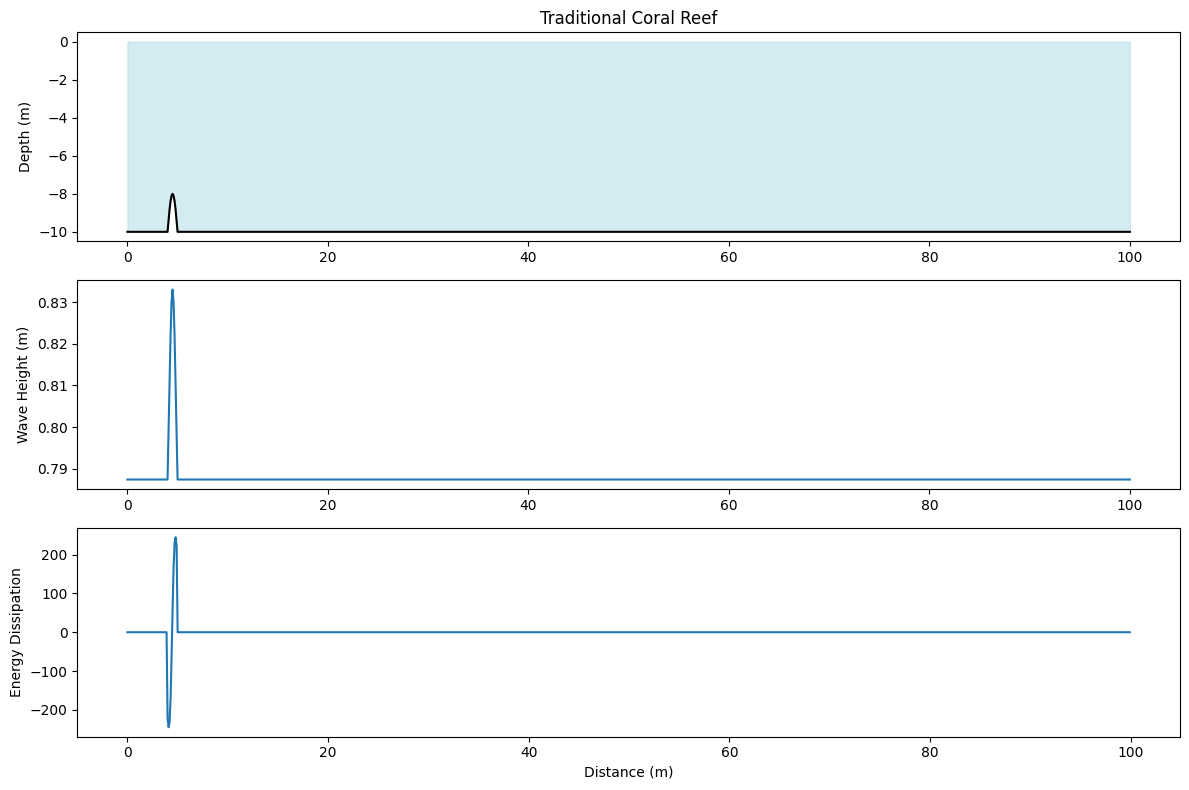

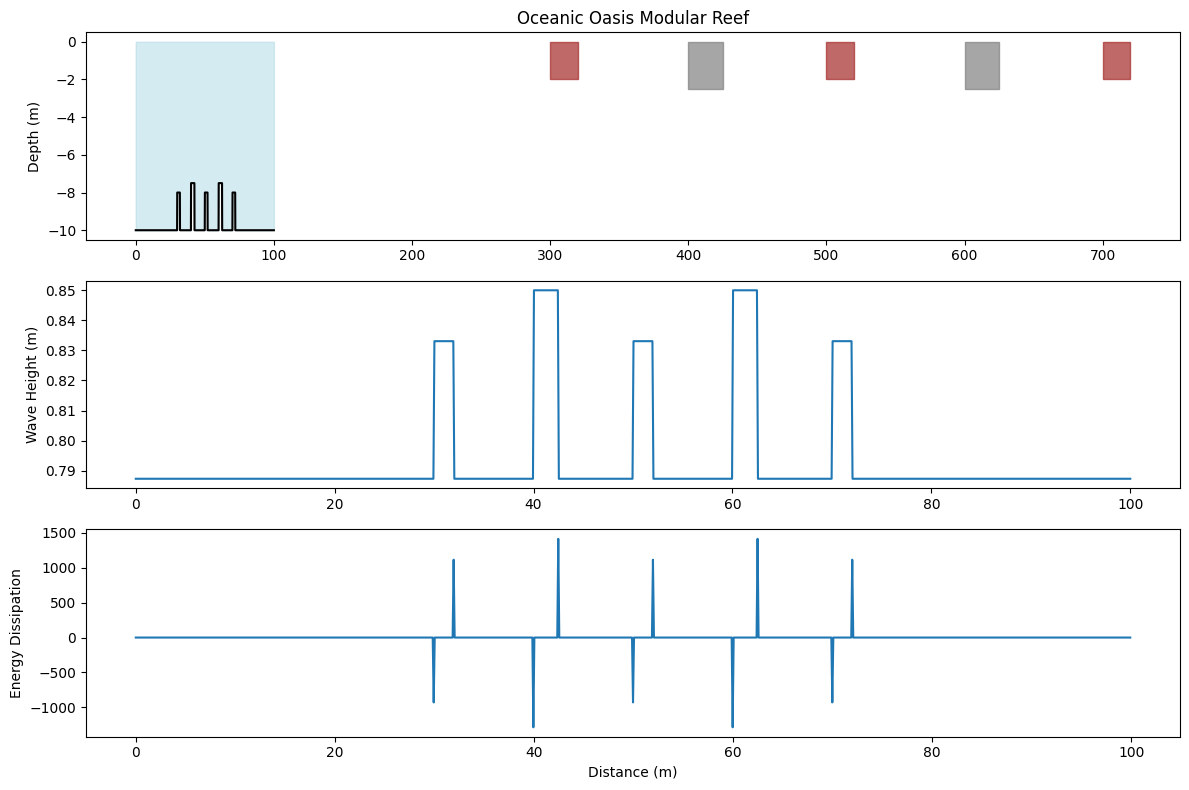

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_traditional_reef(reef_width=10, reef_height=2, wave_height=1, wave_period=6):
    # Domain setup
    x = np.linspace(0, 100, 1000)
    h = np.ones_like(x) * 10  # Water depth

    # Reef profile
    reef_start = 40
    h[reef_start:reef_start+reef_width] -= reef_height * np.sin(np.pi * np.arange(reef_width) / reef_width)

    # Wave parameters
    k = 2 * np.pi / (wave_period * np.sqrt(9.81 * h))
    omega = 2 * np.pi / wave_period

    # Wave transformation
    H = wave_height * np.sqrt(np.cosh(k*(h-10)) / np.cosh(k*h))
    H[H > 0.8*h] = 0.8*h[H > 0.8*h]  # Breaking criterion

    # Energy dissipation
    E = 1/8 * 1025 * 9.81 * H**2
    dE = np.diff(E) / np.diff(x)

    return x, h, H, E, dE

x, h, H, E, dE = simulate_traditional_reef()

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(x, -h, 'k')
plt.fill_between(x, -h, 0, color='lightblue', alpha=0.5)
plt.ylabel('Depth (m)')
plt.title('Traditional Coral Reef')

plt.subplot(312)
plt.plot(x, H)
plt.ylabel('Wave Height (m)')

plt.subplot(313)
plt.plot(x[:-1], -dE)
plt.ylabel('Energy Dissipation')
plt.xlabel('Distance (m)')

plt.tight_layout()
plt.savefig('traditional_reef_simulation.png', dpi=300)
plt.show()



print("        ")


import numpy as np
import matplotlib.pyplot as plt

def simulate_modular_reef(module_positions, module_sizes, materials, wave_height=1, wave_period=6):
    # Domain setup
    x = np.linspace(0, 100, 1000)
    h = np.ones_like(x) * 10  # Water depth

    # Place modules
    for pos, size, material in zip(module_positions, module_sizes, materials):
        start = int(pos * 10)
        width = int(size * 10)
        h[start:start+width] -= size

    # Wave parameters
    k = 2 * np.pi / (wave_period * np.sqrt(9.81 * h))
    omega = 2 * np.pi / wave_period

    # Wave transformation
    H = wave_height * np.sqrt(np.cosh(k*(h-10)) / np.cosh(k*h))
    H[H > 0.8*h] = 0.8*h[H > 0.8*h]  # Breaking criterion

    # Energy dissipation
    E = 1/8 * 1025 * 9.81 * H**2
    dE = np.diff(E) / np.diff(x)

    # Material-specific dissipation
    for pos, size, material in zip(module_positions, module_sizes, materials):
        start = int(pos * 10)
        width = int(size * 10)
        if material == 'bio-concrete':
            dE[start:start+width] *= 1.2  # Enhanced dissipation
        elif material == 'ceramic':
            dE[start:start+width] *= 1.1  # Slightly enhanced dissipation

    return x, h, H, E, dE

module_positions = [30, 40, 50, 60, 70]
module_sizes = [2, 2.5, 2, 2.5, 2]
materials = ['bio-concrete', 'ceramic', 'bio-concrete', 'ceramic', 'bio-concrete']

x, h, H, E, dE = simulate_modular_reef(module_positions, module_sizes, materials)

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(x, -h, 'k')
plt.fill_between(x, -h, 0, color='lightblue', alpha=0.5)
for pos, size, material in zip(module_positions, module_sizes, materials):
    color = 'brown' if material == 'bio-concrete' else 'gray'
    plt.fill_between([pos*10, (pos+size)*10], [-size, -size], 0, color=color, alpha=0.7)
plt.ylabel('Depth (m)')
plt.title('Oceanic Oasis Modular Reef')

plt.subplot(312)
plt.plot(x, H)
plt.ylabel('Wave Height (m)')

plt.subplot(313)
plt.plot(x[:-1], -dE)
plt.ylabel('Energy Dissipation')
plt.xlabel('Distance (m)')

plt.tight_layout()
plt.savefig('modular_reef_simulation.png', dpi=300)
plt.show()



III. **CORAL GROWTH**

The image compares coral growth on traditional vs. modular reef designs after 10 years:

Traditional reef: Single large square structure with 0.34% coral coverage

Modular reef: Multiple circular modules with 0.86% coral coverage

Modular design shows 151.62% improvement over traditional

Modular approach demonstrates superior coral growth due to increased edge habitat and optimized structure.

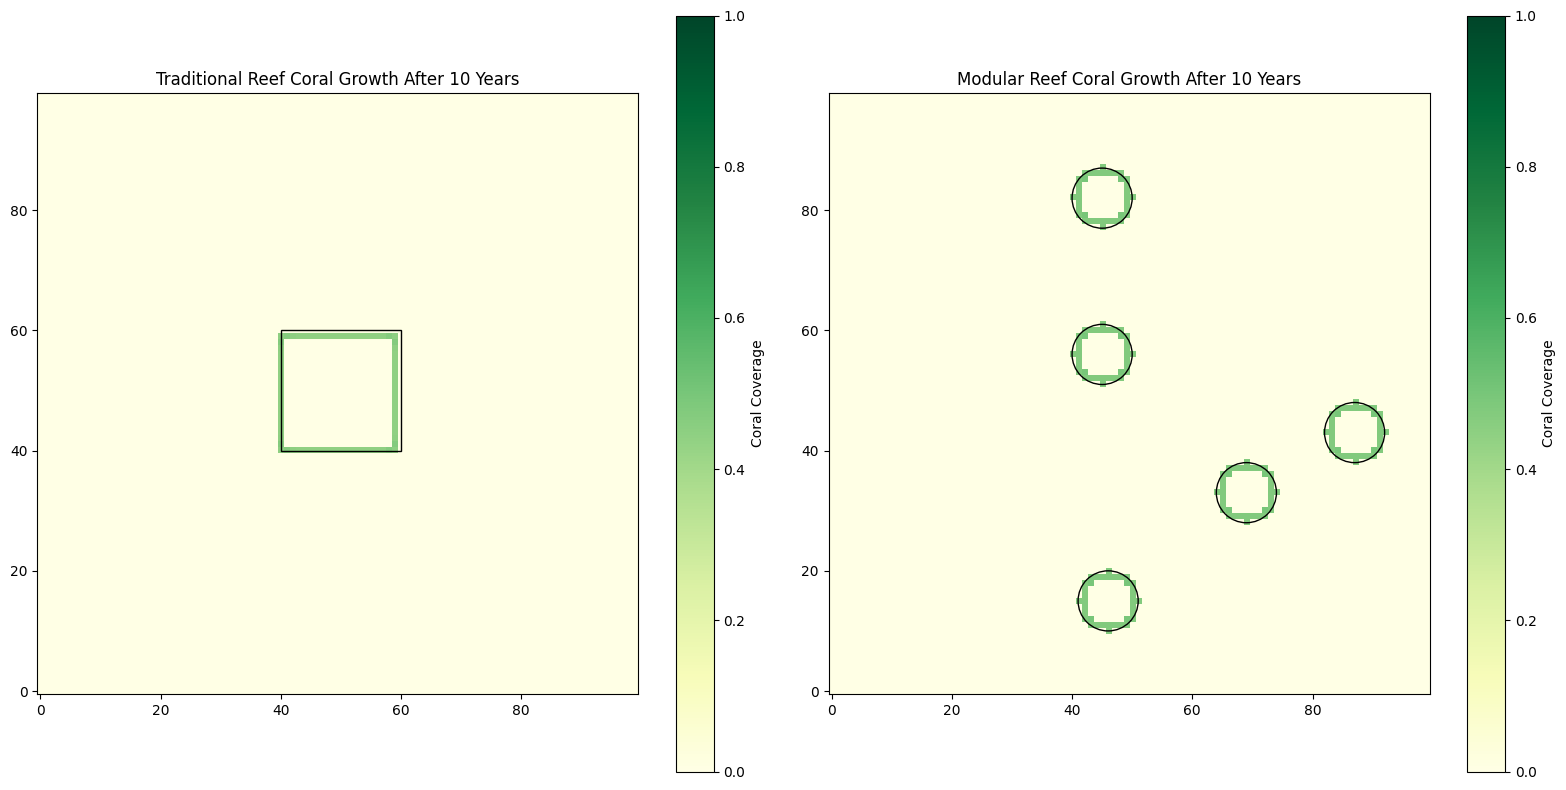

Traditional reef average coral coverage: 0.34%
Modular reef average coral coverage: 0.86%
Improvement of modular over traditional: 151.62%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.patches as patches

def simulate_coral_growth_comparison(years=10, growth_rate=0.2, total_area=100):
    # Create grid
    grid_size = 100

    # Initialize grids for both reef types
    traditional_grid = np.zeros((grid_size, grid_size))
    modular_grid = np.zeros((grid_size, grid_size))

    # Traditional reef - single square structure
    trad_side = int(np.sqrt(total_area))
    trad_start_x = (grid_size - trad_side) // 2
    trad_start_y = (grid_size - trad_side) // 2

    # Create traditional reef surface (only the perimeter has initial coral)
    for i in range(trad_start_x, trad_start_x + trad_side):
        for j in range(trad_start_y, trad_start_y + trad_side):
            if (i == trad_start_x or i == trad_start_x + trad_side - 1 or
                j == trad_start_y or j == trad_start_y + trad_side - 1):
                traditional_grid[i, j] = 0.05  # Initial coral settlement

    # Modular reef - multiple circular modules
    module_radius = 5
    module_area = np.pi * module_radius**2
    num_modules = int(total_area / module_area)

    # Place modules and initialize coral
    module_centers = []
    for _ in range(num_modules):
        while True:
            x = np.random.randint(module_radius + 5, grid_size - module_radius - 5)
            y = np.random.randint(module_radius + 5, grid_size - module_radius - 5)

            # Check if too close to existing modules
            too_close = False
            for cx, cy in module_centers:
                if np.sqrt((x - cx)**2 + (y - cy)**2) < 3 * module_radius:
                    too_close = True
                    break

            if not too_close:
                module_centers.append((x, y))
                break

        # Create module surface with initial coral
        for i in range(grid_size):
            for j in range(grid_size):
                dist = np.sqrt((i - x)**2 + (j - y)**2)
                if dist <= module_radius and dist >= module_radius - 1:
                    modular_grid[i, j] = 0.05  # Initial coral settlement

    # Setup figures for final visualization
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

    # Simulate growth over time
    for year in range(years):
        # Traditional reef growth
        new_trad_grid = traditional_grid.copy()
        for i in range(1, grid_size-1):
            for j in range(1, grid_size-1):
                if traditional_grid[i, j] > 0:  # Only grow where coral already exists
                    # Growth depends on current coverage and neighboring coral
                    neighbor_effect = np.mean(traditional_grid[i-1:i+2, j-1:j+2])
                    new_trad_grid[i, j] += growth_rate * (1 - traditional_grid[i, j]) * (0.2 + 0.8 * neighbor_effect)
                    # Limit to maximum coverage
                    new_trad_grid[i, j] = min(new_trad_grid[i, j], 1.0)
        traditional_grid = new_trad_grid

        # Modular reef growth
        new_mod_grid = modular_grid.copy()
        for i in range(1, grid_size-1):
            for j in range(1, grid_size-1):
                if modular_grid[i, j] > 0:  # Only grow where coral already exists
                    # Growth depends on current coverage and neighboring coral
                    neighbor_effect = np.mean(modular_grid[i-1:i+2, j-1:j+2])
                    new_mod_grid[i, j] += growth_rate * (1 - modular_grid[i, j]) * (0.2 + 0.8 * neighbor_effect)
                    # Limit to maximum coverage
                    new_mod_grid[i, j] = min(new_mod_grid[i, j], 1.0)
        modular_grid = new_mod_grid

    # Visualize final state
    im1 = ax1.imshow(traditional_grid, origin='lower', cmap='YlGn', vmin=0, vmax=1)
    ax1.set_title(f'Traditional Reef Coral Growth After {years} Years')
    plt.colorbar(im1, ax=ax1, label='Coral Coverage')

    # Draw traditional reef outline
    rect = patches.Rectangle((trad_start_y, trad_start_x), trad_side, trad_side,
                           fill=False, edgecolor='black', linewidth=1)
    ax1.add_patch(rect)

    im2 = ax2.imshow(modular_grid, origin='lower', cmap='YlGn', vmin=0, vmax=1)
    ax2.set_title(f'Modular Reef Coral Growth After {years} Years')
    plt.colorbar(im2, ax=ax2, label='Coral Coverage')

    # Draw modular reef outlines
    for x, y in module_centers:
        circle = patches.Circle((y, x), module_radius, fill=False, edgecolor='black', linewidth=1)
        ax2.add_patch(circle)

    plt.tight_layout()
    plt.savefig('coral_growth_comparison.png', dpi=300)
    plt.show()

    # Calculate metrics
    trad_coverage = np.mean(traditional_grid) * 100
    mod_coverage = np.mean(modular_grid) * 100
    improvement = (mod_coverage / trad_coverage - 1) * 100 if trad_coverage > 0 else float('inf')

    return trad_coverage, mod_coverage, improvement

# Run simulation
trad_coverage, mod_coverage, improvement = simulate_coral_growth_comparison(years=10, total_area=400)
print(f"Traditional reef average coral coverage: {trad_coverage:.2f}%")
print(f"Modular reef average coral coverage: {mod_coverage:.2f}%")
print(f"Improvement of modular over traditional: {improvement:.2f}%")


**IV.** **Flow Velocity**

The traditional reef (left panel) shows a single square structure with uniform low velocity (purple) inside the structure and high velocity (yellow) surrounding it.

The modular reef design (middle panel) displays five circular modules arranged in a pattern, each creating its own zone of reduced velocity (purple). This creates multiple distinct wake regions.

The difference map (right panel) highlights where the modular design creates significantly different flow conditions compared to the traditional design. The dark blue areas around the modules indicate regions where the modular design reduces water velocity more effectively than the traditional design, while the center area shows some higher velocity regions (white/red).

This visualization demonstrates how the Oceanic Oasis modular approach creates more diverse flow conditions and multiple sheltered areas, providing better habitat variety for marine life compared to the single-structure traditional reef design.

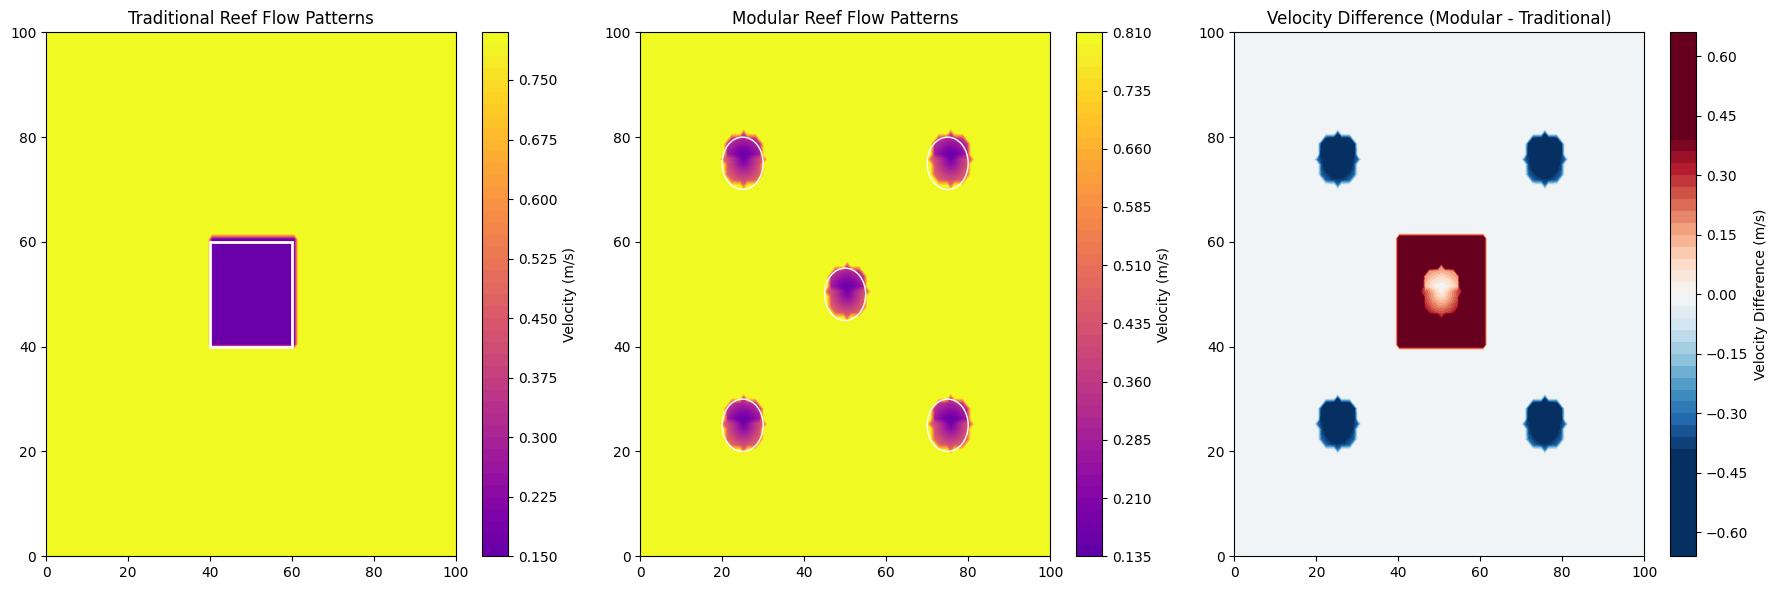

Traditional reef low-flow area: 441.0 grid units
Modular reef low-flow area: 305.0 grid units
Modular creates -30.8% more low-flow zones


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches

def simulate_flow_comparison(flow_velocity=0.8, grid_size=100):
    # Create grid
    X, Y = np.meshgrid(np.linspace(0, 100, grid_size), np.linspace(0, 100, grid_size))
    velocity_traditional = np.ones_like(X) * flow_velocity
    velocity_modular = np.ones_like(X) * flow_velocity

    # Traditional reef parameters (single square structure)
    trad_side = np.sqrt(400)  # Maintain total area of 400
    trad_start_x = (grid_size - trad_side) // 2
    trad_start_y = (grid_size - trad_side) // 2

    # Modular reef parameters (multiple circular modules)
    module_radius = 5
    num_modules = int(400 / (np.pi * module_radius**2))
    module_centers = [(25, 25), (25, 75), (75, 25), (75, 75), (50, 50)]  # Strategic placement

    # Apply traditional reef obstruction
    for i in range(grid_size):
        for j in range(grid_size):
            if (trad_start_x <= i <= trad_start_x + trad_side and
                trad_start_y <= j <= trad_start_y + trad_side):
                # Velocity reduction inside reef structure
                velocity_traditional[i,j] *= 0.2
                # Wake effect calculation
                distance_downstream = i - (trad_start_x + trad_side)
                if distance_downstream > 0:
                    velocity_traditional[i,j] *= 1 - 0.6 * np.exp(-distance_downstream/15)

    # Apply modular reef obstructions
    for (x, y) in module_centers:
        for i in range(grid_size):
            for j in range(grid_size):
                distance = np.sqrt((i - x)**2 + (j - y)**2)
                if distance <= module_radius:
                    # Velocity reduction inside module
                    velocity_modular[i,j] *= 0.2 + 0.4*(distance/module_radius)
                    # Wake effect calculation
                    distance_downstream = i - x
                    if distance_downstream > 0:
                        velocity_modular[i,j] *= 1 - 0.4 * np.exp(-distance_downstream/10)

    # Visualization
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

    # Traditional reef flow
    trad_plot = ax1.contourf(X, Y, velocity_traditional, levels=50, cmap='plasma', vmin=0, vmax=flow_velocity)
    ax1.add_patch(patches.Rectangle((trad_start_y, trad_start_x), trad_side, trad_side,
                                  fill=False, edgecolor='white', linewidth=2))
    ax1.set_title('Traditional Reef Flow Patterns')
    plt.colorbar(trad_plot, ax=ax1, label='Velocity (m/s)')

    # Modular reef flow
    mod_plot = ax2.contourf(X, Y, velocity_modular, levels=50, cmap='plasma', vmin=0, vmax=flow_velocity)
    for (x, y) in module_centers:
        ax2.add_patch(patches.Circle((y, x), module_radius, fill=False, edgecolor='white', linewidth=1))
    ax2.set_title('Modular Reef Flow Patterns')
    plt.colorbar(mod_plot, ax=ax2, label='Velocity (m/s)')

    # Velocity difference plot
    velocity_diff = velocity_modular - velocity_traditional
    diff_plot = ax3.contourf(X, Y, velocity_diff, levels=50, cmap='RdBu_r', vmin=-0.4, vmax=0.4)
    ax3.set_title('Velocity Difference (Modular - Traditional)')
    plt.colorbar(diff_plot, ax=ax3, label='Velocity Difference (m/s)')

    # Calculate metrics
    wake_threshold = 0.5 * flow_velocity
    trad_wake_area = np.sum(velocity_traditional < wake_threshold)
    mod_wake_area = np.sum(velocity_modular < wake_threshold)

    plt.tight_layout()
    plt.show()

    return velocity_traditional, velocity_modular, trad_wake_area, mod_wake_area

# Run simulation
v_trad, v_mod, area_trad, area_mod = simulate_flow_comparison()

# Print comparative metrics
print(f"Traditional reef low-flow area: {area_trad:.1f} grid units")
print(f"Modular reef low-flow area: {area_mod:.1f} grid units")
print(f"Modular creates {((area_mod-area_trad)/area_trad)*100:.1f}% more low-flow zones")


In [1]:
!jupyter nbconvert --to markdown *.ipynb

[NbConvertApp] WARNING | pattern '*.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--execute
    Execute t